mengubah gambar menjadi array. lalu di simpan kedalam pickle
https://pythonprogramming.net/python-pickle-module-save-objects-serialization/

In [0]:
import os
from google.colab import drive 
drive.mount('/content/drive')

DATADIR = "/content/drive/My Drive/Skripsi/fix/training"
# r=root, d=directories, f = files
folders = []
for r, d, f in os.walk(DATADIR):
    for folder in sorted(d):
        folders.append(os.path.join(r, folder))

for d in folders:
    print(d)
    

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Skripsi/fix/training/harimau
/content/drive/My Drive/Skripsi/fix/training/jaguar
/content/drive/My Drive/Skripsi/fix/training/macan tutul
/content/drive/My Drive/Skripsi/fix/training/singa


##Lokasi folder

In [0]:
CATEGORIES = sorted(os.listdir(DATADIR))
print(CATEGORIES)

['harimau', 'jaguar', 'macan tutul', 'singa']


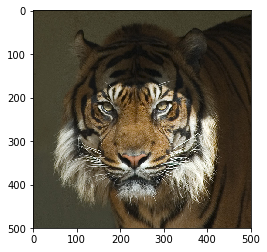

In [0]:
import cv2
import matplotlib.pyplot as plt

for category in CATEGORIES:  # untuk looping setiap kategori "harimau", "jaguar","macantutul","singa"
    path = os.path.join(DATADIR,category)  # definisi lokasi gambar
    for img in os.listdir(path):  # perulangan gambar tiap category
        img_array = cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)  # konversi array rgb
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()  # display!
        break 
    break

In [0]:
print('ukuran gambar : ', img_array.shape)

ukuran gambar :  (500, 500, 3)


##Reshape

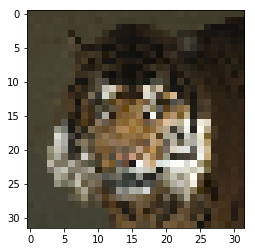

In [0]:
#untuk resize ukuran gambar

IMG_SIZE = 32

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE),cv2.COLOR_BGR2RGB) #cv2.COLOR_BGR2RGB
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
print('setelah di resize : ', new_array.shape)

setelah di resize :  (32, 32, 3)


In [0]:
training_data = []

In [0]:
from tqdm import tqdm


def create_training_data():
    for category in CATEGORIES: 
        path = os.path.join(DATADIR,category)  # path untuk lokasi gambar
        class_num = CATEGORIES.index(category)  # get the classification  (0, 1, 2, 3) angkanya urut nama  (harimau, jaguar, macan tutul, singa)

        for img in tqdm(os.listdir(path)):  # iterasi gambar setiap kelas
            try:
                img_array = cv2.imread(os.path.join(path,img))  # konversi ke array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize gambar
                training_data.append([new_array, class_num])  # Memassukan ke training_data
            except Exception as e:  
                pass


create_training_data()

100%|██████████| 1795/1795 [10:08<00:00,  3.17it/s]


In [0]:
print("Total gambar : ", len(training_data))

Total gambar :  6795


In [0]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print("label : ", CATEGORIES[sample[1]])

label :  harimau
label :  harimau
label :  harimau
label :  jaguar
label :  jaguar
label :  singa
label :  jaguar
label :  macan tutul
label :  macan tutul
label :  harimau


cek label data

In [0]:
X = [] #gambar
y = [] #label

for features,label in training_data:
    X.append(features)
    y.append(label)

In [0]:
import numpy as np
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3) 

In [0]:
print("Jumlah gambar serta ukuran : ",X.shape)

Jumlah gambar serta ukuran :  (6795, 32, 32, 3)


In [0]:
import pickle

pickle_out = open("/content/drive/My Drive/Skripsi/fix/X_raw_32.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/My Drive/Skripsi/fix/y_raw_32.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
#Memuat data 
import pickle

pickle_in = open("/content/drive/My Drive/Skripsi/fix/X_raw.pickle","rb")
X_raw = pickle.load(pickle_in)

pickle_in = open("/content/drive/My Drive/Skripsi/fix/y_raw.pickle","rb")
y_raw = pickle.load(pickle_in)



FileNotFoundError: ignored

In [0]:
# mengubah tipe data menjadi float
X_load_float = X_raw.astype('float32')
#print(X_load_float[0])

In [0]:
# Proses Normalisasi 
# Jalankan 1x
X_load_float = X_load_float/255


In [0]:
print(X_load_float[0])

[[[0.1254902  0.31764707 0.20784314]
  [0.21960784 0.5019608  0.3764706 ]
  [0.29803923 0.58431375 0.45882353]
  ...
  [0.04313726 0.07843138 0.04705882]
  [0.04705882 0.05098039 0.04313726]
  [0.01568628 0.01960784 0.01176471]]

 [[0.09411765 0.25490198 0.15294118]
  [0.18039216 0.40784314 0.2901961 ]
  [0.24705882 0.4862745  0.3647059 ]
  ...
  [0.03529412 0.07843138 0.03921569]
  [0.03529412 0.05098039 0.03137255]
  [0.01176471 0.03137255 0.00784314]]

 [[0.03137255 0.13333334 0.05098039]
  [0.10980392 0.22352941 0.12156863]
  [0.14901961 0.29411766 0.18039216]
  ...
  [0.01960784 0.07058824 0.02352941]
  [0.01176471 0.05882353 0.01176471]
  [0.00392157 0.05098039 0.00392157]]

 ...

 [[0.827451   0.9019608  0.9647059 ]
  [0.93333334 0.9529412  0.9843137 ]
  [0.85490197 0.85882354 0.8980392 ]
  ...
  [0.5176471  0.59607846 0.57254905]
  [0.41960785 0.4509804  0.4117647 ]
  [0.22352941 0.24313726 0.1764706 ]]

 [[0.84705883 0.9137255  0.9490196 ]
  [0.94509804 0.9607843  0.98039216]


In [0]:
# class to_categorical kita butuhkan dari library keras
from keras.utils import np_utils
num_class = 4

y_train_ohe = np_utils.to_categorical(y_raw, num_class)

Using TensorFlow backend.


In [0]:
import numpy as np

print('Bentuk X_train sekarang : ', X_load_float.shape)
print('Bentuk y_val sekarang : ', np.array(y_train_ohe).shape)


Bentuk X_train sekarang :  (6795, 224, 224, 3)
Bentuk y_val sekarang :  (6795, 4)


In [0]:

for i in range (0, 10):
  print('\nOne-hot encoding:')
  print(CATEGORIES[y_raw[i]], y_train_ohe[i])
  i = i+1


One-hot encoding:
macan tutul [0. 0. 1. 0.]

One-hot encoding:
singa [0. 0. 0. 1.]

One-hot encoding:
jaguar [0. 1. 0. 0.]

One-hot encoding:
harimau [1. 0. 0. 0.]

One-hot encoding:
harimau [1. 0. 0. 0.]

One-hot encoding:
jaguar [0. 1. 0. 0.]

One-hot encoding:
harimau [1. 0. 0. 0.]

One-hot encoding:
singa [0. 0. 0. 1.]

One-hot encoding:
harimau [1. 0. 0. 0.]

One-hot encoding:
harimau [1. 0. 0. 0.]


In [0]:
import pickle

pickle_out = open("/content/drive/My Drive/Skripsi/fix/X_train.pickle","wb")
pickle.dump(X_load_float, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/My Drive/Skripsi/fix/y_train.pickle","wb")
pickle.dump(y_raw, pickle_out)
pickle_out.close()